<a href="https://colab.research.google.com/github/rajeshkpandey/AWESOME-FER/blob/master/Epidemics_ABM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

node degree clustering
0 10 0.08888888888888889
1 12 0.15151515151515152
2 9 0.1111111111111111
3 20 0.07368421052631578
4 8 0.03571428571428571
5 8 0.07142857142857142
6 8 0.07142857142857142
7 9 0.1111111111111111
8 8 0.21428571428571427
9 17 0.09558823529411764
10 11 0.09090909090909091
11 10 0.1111111111111111
12 15 0.06666666666666667
13 10 0.06666666666666667
14 8 0.07142857142857142
15 11 0.14545454545454545
16 6 0.13333333333333333
17 8 0.10714285714285714
18 8 0.03571428571428571
19 10 0.13333333333333333
20 14 0.15384615384615385
21 13 0.05128205128205128
22 9 0.1111111111111111
23 8 0.07142857142857142
24 15 0.02857142857142857
25 13 0.11538461538461539
26 8 0.07142857142857142
27 13 0.15384615384615385
28 11 0.09090909090909091
29 9 0.1388888888888889
30 4 0.3333333333333333
31 8 0.14285714285714285
32 9 0.08333333333333333
33 8 0.10714285714285714
34 3 0.6666666666666666
35 5 0.2
36 12 0.12121212121212122
37 14 0.0989010989010989
38 12 0.045454545454545456
39 12 0.13636363

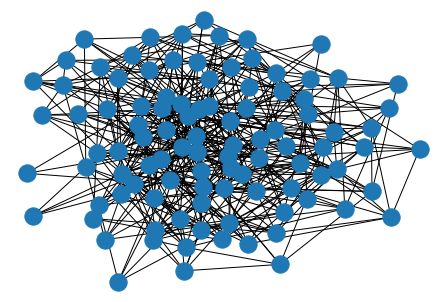

In [1]:
#Erdos-Renyi Graph in Networkx
import random
from networkx import nx
import matplotlib.pyplot as plt

N = 100  # 100 nodes
K = 200  # 200 agents
#M = 300  # 300 edges

#Graph = nx.gnm_random_graph(N, M)

P = 0.1 #Probabibilty for Node Connection in random graph
Graph = nx.erdos_renyi_graph(N,P) # Use Networkx to generate a random graph of N nodes being connected with probability P.

# some network properties
print("node degree clustering")
for v in nx.nodes(Graph):
    print(f"{v} {nx.degree(Graph, v)} {nx.clustering(Graph, v)}")

print()
print("the adjacency list")
for line in nx.generate_adjlist(Graph):
    print(line)

nx.draw(Graph)
plt.show()

In [2]:
A = nx.adjacency_matrix(Graph)
Adjacency_matrix = A.todense()
print(Adjacency_matrix[0])

[[0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 0 1
  0 0 0 0 0 1 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 1 0 0 0 0]]


In [3]:
#Empty Node Dictionary [ A Dictionary consisting list of agent states on Graph Node]
Node = {}
print(Node)
for i in range(N):
  Node[i] = list()
print(Node)


{}
{0: [], 1: [], 2: [], 3: [], 4: [], 5: [], 6: [], 7: [], 8: [], 9: [], 10: [], 11: [], 12: [], 13: [], 14: [], 15: [], 16: [], 17: [], 18: [], 19: [], 20: [], 21: [], 22: [], 23: [], 24: [], 25: [], 26: [], 27: [], 28: [], 29: [], 30: [], 31: [], 32: [], 33: [], 34: [], 35: [], 36: [], 37: [], 38: [], 39: [], 40: [], 41: [], 42: [], 43: [], 44: [], 45: [], 46: [], 47: [], 48: [], 49: [], 50: [], 51: [], 52: [], 53: [], 54: [], 55: [], 56: [], 57: [], 58: [], 59: [], 60: [], 61: [], 62: [], 63: [], 64: [], 65: [], 66: [], 67: [], 68: [], 69: [], 70: [], 71: [], 72: [], 73: [], 74: [], 75: [], 76: [], 77: [], 78: [], 79: [], 80: [], 81: [], 82: [], 83: [], 84: [], 85: [], 86: [], 87: [], 88: [], 89: [], 90: [], 91: [], 92: [], 93: [], 94: [], 95: [], 96: [], 97: [], 98: [], 99: []}


In [4]:
#Adding Virus_presence Randomly
for i in range(N):
  Virus_presence=random.uniform(0,1)
  Node[i].append(Virus_presence)
print(Node)

{0: [0.5599291309656698], 1: [0.5060452868075549], 2: [0.15044207879412796], 3: [0.9495164743240164], 4: [0.9444110947102399], 5: [0.025497751089971432], 6: [0.3201650002167642], 7: [0.7858226304674708], 8: [0.12856908616551954], 9: [0.3373268078679499], 10: [0.8701036678637196], 11: [0.4304817325333866], 12: [0.42656300006750114], 13: [0.33452178404817245], 14: [0.7299675282480134], 15: [0.3243703933358354], 16: [0.819504264135377], 17: [0.9724948325856486], 18: [0.17996175698621353], 19: [0.4519908585876087], 20: [0.5679240341235964], 21: [0.6853810645014813], 22: [0.8073667951488983], 23: [0.8406155046439842], 24: [0.5099813061426082], 25: [0.22803976528933823], 26: [0.05843503639570613], 27: [0.44286230556269546], 28: [0.1675012198355057], 29: [0.36062954996630603], 30: [0.9415851036196722], 31: [0.6223806429264442], 32: [0.796402454476463], 33: [0.8607193583186934], 34: [0.2454216932522898], 35: [0.453874529614853], 36: [0.6356173675304649], 37: [0.1530935369154277], 38: [0.083135

In [5]:
#Initailizing randomly infection state [0 shows Recovered, 1 shows Susceptible, and 2 shows Infected]
for k in range(K):
  rand_node=random.randint(0,N-1)
  rand_state=random.randint(0,2)
  Node[rand_node].append(rand_state)
print(Node)

{0: [0.5599291309656698, 1, 2, 2], 1: [0.5060452868075549, 2], 2: [0.15044207879412796, 0, 2, 0, 0], 3: [0.9495164743240164, 0, 2], 4: [0.9444110947102399, 2, 2], 5: [0.025497751089971432, 1, 0, 0], 6: [0.3201650002167642, 2, 1, 0, 1], 7: [0.7858226304674708], 8: [0.12856908616551954, 1, 1, 1], 9: [0.3373268078679499, 2], 10: [0.8701036678637196, 1, 1], 11: [0.4304817325333866, 2, 1, 1], 12: [0.42656300006750114, 2], 13: [0.33452178404817245, 2], 14: [0.7299675282480134, 1], 15: [0.3243703933358354, 0], 16: [0.819504264135377], 17: [0.9724948325856486, 0, 0], 18: [0.17996175698621353], 19: [0.4519908585876087, 0, 1, 2], 20: [0.5679240341235964, 0], 21: [0.6853810645014813], 22: [0.8073667951488983, 2, 1], 23: [0.8406155046439842, 0, 2, 0], 24: [0.5099813061426082, 1], 25: [0.22803976528933823, 0], 26: [0.05843503639570613, 1, 0, 1, 0, 0], 27: [0.44286230556269546], 28: [0.1675012198355057, 1, 2], 29: [0.36062954996630603, 0], 30: [0.9415851036196722, 2, 2, 1, 2, 2], 31: [0.622380642926

In [6]:
#Random Walk Implementation
def random_walk(Graph=Graph, Node=Node, num_walks=1, num_steps=1):
    walks = list()
    Node_next = {}
    for i in range(len(Node)):
      Node_next[i] = list() 
    for i in range(len(Node)):
      Node_next[i].append(Node[i][0])
    for i in range(len(Node)):
        for agent in list(range(1,len(Node[i]))):
          for walk in range(num_walks):
              curr_walk = [i]
              curr = i
              for step in range(num_steps):
                  neighbors = list(Graph.neighbors(curr))
                  neighbors.append(curr) #including no movement case
                  possible_moves=neighbors 
                  if len(possible_moves) > 0:
                      next = random.choice(possible_moves)
                  Node_next[next].append(Node[curr][agent])
                  curr_walk.append(next)
                  #print(curr_walk)
              walks.append(next)
    return Node,Node_next

In [8]:
print(Node)
Node_p,Node_n = random_walk(Graph,Node)
#print(Node_p)
print(Node_n)
for i in range(10):
  Node_p,Node_n = random_walk(Graph,Node_n)
  #print(Node_p)
  print(Node_n)

{0: [0.5599291309656698, 1, 2, 2], 1: [0.5060452868075549, 2], 2: [0.15044207879412796, 0, 2, 0, 0], 3: [0.9495164743240164, 0, 2], 4: [0.9444110947102399, 2, 2], 5: [0.025497751089971432, 1, 0, 0], 6: [0.3201650002167642, 2, 1, 0, 1], 7: [0.7858226304674708], 8: [0.12856908616551954, 1, 1, 1], 9: [0.3373268078679499, 2], 10: [0.8701036678637196, 1, 1], 11: [0.4304817325333866, 2, 1, 1], 12: [0.42656300006750114, 2], 13: [0.33452178404817245, 2], 14: [0.7299675282480134, 1], 15: [0.3243703933358354, 0], 16: [0.819504264135377], 17: [0.9724948325856486, 0, 0], 18: [0.17996175698621353], 19: [0.4519908585876087, 0, 1, 2], 20: [0.5679240341235964, 0], 21: [0.6853810645014813], 22: [0.8073667951488983, 2, 1], 23: [0.8406155046439842, 0, 2, 0], 24: [0.5099813061426082, 1], 25: [0.22803976528933823, 0], 26: [0.05843503639570613, 1, 0, 1, 0, 0], 27: [0.44286230556269546], 28: [0.1675012198355057, 1, 2], 29: [0.36062954996630603, 0], 30: [0.9415851036196722, 2, 2, 1, 2, 2], 31: [0.622380642926